# Focus types
## The idea is to find out the ratio of incidents that happens for each borough based on types. By doing so, we can create a histogram showing that represents the ratio for each types in each borough, and we can see if there are any type that sticks out.

In [15]:
import pandas as pd
import numpy as np
from __future__ import division #

%matplotlib inline

In [43]:
#Get Data from of Moter Vehicle Collisions
incidents = pd.read_csv('datasets/NYPD_Motor_Vehicle_Collisions.csv')
print len(incidents)

incidentsFiltered = incidents[(incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Prescription Medication")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Driver Inattention/Distraction")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Other Vehicular")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Failure to Yield Right-of-Way")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Fatigued/Drowsy")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Turning Improperly")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Driver Inexperience")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Backing Unsafely")|(
           incidents['CONTRIBUTING FACTOR VEHICLE 1']=="Outside Car Distraction")]
print len(incidentsFiltered)
#incidents[()]

#incidents[['Other Vehicular', 'Failure to Yield Right-of-Way', 'Driver inexperience', 'Fatigued/Drowsy', 
  #         'Driver Inattention/Distraction', 'Turning Improperly',]] 
    


769054
278858


In [51]:
from collections import Counter
ConditionIncidentCounter = Counter(incidentsFiltered['CONTRIBUTING FACTOR VEHICLE 1'].values)
print ConditionIncidentCounter
p_incident = {}
for k,v in ConditionIncidentCounter.most_common():
    p_incident[k] = v/len(incidents)

p_incident

# Do the same again but for individual areas of NYC
p_incident_district = {}
l = len(incidents)
for district in incidentsFiltered[pd.notnull(incidents.BOROUGH)].BOROUGH.unique():
    filtered = incidentsFiltered[incidents.BOROUGH == district]
    counter = Counter(filtered['CONTRIBUTING FACTOR VEHICLE 1'].values)
    p_incident_district[district] = {}
    for k,v in counter.most_common():
            p_incident_district[district][k] = v / len(list(counter.elements()));

Counter({'Driver Inattention/Distraction': 95980, 'Fatigued/Drowsy': 45854, 'Failure to Yield Right-of-Way': 33617, 'Other Vehicular': 26812, 'Backing Unsafely': 21789, 'Turning Improperly': 20170, 'Prescription Medication': 15251, 'Outside Car Distraction': 9916, 'Driver Inexperience': 9469})


/Users/dxong/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e77f650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14b817ad0>]], dtype=object)

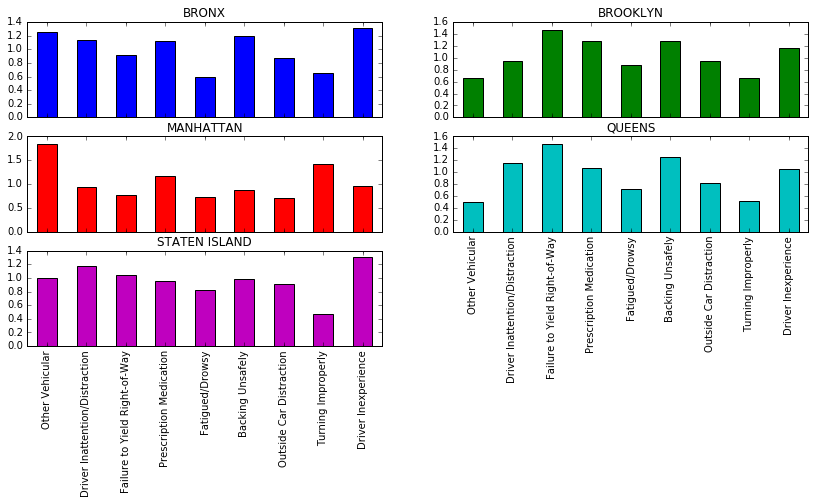

In [56]:
from collections import Counter
ConditionIncidentCounter = Counter(incidentsFiltered['CONTRIBUTING FACTOR VEHICLE 1'].values)

p_incident = {}
for k,v in ConditionIncidentCounter.most_common():
    p_incident[k] = v/len(incidentsFiltered)

p_incident

# Do the same again but for individual areas of NYC
p_incident_district = {}
l = len(incidents)
for district in incidentsFiltered[pd.notnull(incidents.BOROUGH)].BOROUGH.unique():
    filtered = incidentsFiltered[incidents.BOROUGH == district]
    counter = Counter(filtered['CONTRIBUTING FACTOR VEHICLE 1'].values)
    p_incident_district[district] = {}
    for k,v in counter.most_common():
            p_incident_district[district][k] = v / len(list(counter.elements()));
            
p_incident_district

# Are there any areas in NYC that experience incidents based 
#  on a condition unusually higher or lower compared to other areas?
# Calculate the ratio of incidents based on the condition.
def calcRatioForDistrict(districtCounter, overAllCounter, district):
    ys = []
    xs = []
    for con in incidentsFiltered['CONTRIBUTING FACTOR VEHICLE 1'].unique():
        if (con in districtCounter):
            ys.append(districtCounter[con] / overAllCounter[con])
        else:
            ys.append(0)
        xs.append(con)
    return pd.Series(ys, index=xs)
    
series = {}
for b in incidents[pd.notnull(incidents.BOROUGH)].BOROUGH.unique():
    series[b] = calcRatioForDistrict(p_incident_district[b], p_incident, b)

df = pd.DataFrame(series)
df.plot(kind="bar", subplots=True, figsize=(14,14),layout=(7,2), legend=False,sharey=False)